In [1]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
mushroom = fetch_ucirepo(id=73)

# data (as pandas dataframes)
X = mushroom.data.features
y = mushroom.data.targets
X.shape, y.shape

((8124, 22), (8124, 1))

In [2]:
X.head().T

,0,1,2,3,4
cap-shape,x,x,b,x,x
cap-surface,s,s,s,y,s
cap-color,n,y,w,w,g
bruises,t,t,t,t,f
odor,p,a,l,p,n
gill-attachment,f,f,f,f,f
gill-spacing,c,c,c,c,w
gill-size,n,b,b,n,b
gill-color,k,k,n,n,k
stalk-shape,e,e,e,e,t


In [4]:
# metadata
import json

print(json.dumps(mushroom.metadata, indent=2))

{
  "uci_id": 73,
  "name": "Mushroom",
  "repository_url": "https://archive.ics.uci.edu/dataset/73/mushroom",
  "data_url": "https://archive.ics.uci.edu/static/public/73/data.csv",
  "abstract": "From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible",
  "area": "Biology",
  "tasks": [
    "Classification"
  ],
  "characteristics": [
    "Multivariate"
  ],
  "num_instances": 8124,
  "num_features": 22,
  "feature_types": [
    "Categorical"
  ],
  "demographics": [],
  "target_col": [
    "poisonous"
  ],
  "index_col": null,
  "has_missing_values": "yes",
  "missing_values_symbol": "NaN",
  "year_of_dataset_creation": 1981,
  "last_updated": "Thu Aug 10 2023",
  "dataset_doi": "10.24432/C5959T",
  "creators": [],
  "intro_paper": null,
  "additional_info": {
    "summary": "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Fam

In [5]:
print(mushroom.metadata["additional_info"]["variable_info"])

     1. cap-shape:                bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
     4. bruises?:                 bruises=t,no=f
     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
     6. gill-attachment:          attached=a,descending=d,free=f,notched=n
     7. gill-spacing:             close=c,crowded=w,distant=d
     8. gill-size:                broad=b,narrow=n
     9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
    10. stalk-shape:              enlarging=e,tapering=t
    11. stalk-root:               bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
    12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
    13. stalk-surfac

In [6]:
# variable information
print(mushroom.variables)

                        name     role         type demographic  \
0                  poisonous   Target  Categorical        None   
1                  cap-shape  Feature  Categorical        None   
2                cap-surface  Feature  Categorical        None   
3                  cap-color  Feature       Binary        None   
4                    bruises  Feature  Categorical        None   
5                       odor  Feature  Categorical        None   
6            gill-attachment  Feature  Categorical        None   
7               gill-spacing  Feature  Categorical        None   
8                  gill-size  Feature  Categorical        None   
9                 gill-color  Feature  Categorical        None   
10               stalk-shape  Feature  Categorical        None   
11                stalk-root  Feature  Categorical        None   
12  stalk-surface-above-ring  Feature  Categorical        None   
13  stalk-surface-below-ring  Feature  Categorical        None   
14    stal

In [7]:
y.head()

,poisonous
0,p
1,e
2,e
3,p
4,e


In [8]:
import pandas as pd

In [9]:
df = pd.concat([X, y], axis="columns")
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


In [10]:
from sklearn.feature_extraction import FeatureHasher
from sklearn.neural_network import MLPRegressor

In [11]:
# We set alternate sign to false because we want positive numbers only.
# This is important for the training to avoid -tive predictions.
hasher = FeatureHasher(n_features=100, input_type="string", alternate_sign=True)


def preprocess(state, action):
    features = [f"{key}:{value}^{action}" for key, value in state.items()]
    # features = [f"{key}:{value}" for key, value in state.items()]
    # features += [action]
    # print(features)
    return hasher.transform([features]).toarray()[0]

In [21]:
X_i = df.iloc[0, :-1]
y_i = df.iloc[0, -1:]
preprocess(X_i, "eat"), preprocess(X_i, "throw"), y_i

(array([ 1.,  0.,  0., -1., -2.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0., -1.,  0.,  0.,
        -1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,
        -1.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1., -1.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,
         0.,  1.,  0.,  0.,  0.,  0., -1.,  0.,  1.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0., -1.,  0., -1.,  0.,  0.,  1.,  

The MLPRegressor in Scikit-learn does not have a built-in way to restrict the output to non-negative values. However, there are a few workarounds you can use:

1. **Post-processing**: After getting the predictions, you can simply set all negative values to zero. This is the simplest method, but it might not be the best solution if a large number of your predictions are negative.

```python
predictions = model.predict(X)
predictions = np.maximum(predictions, 0)
```

2. **Log transformation**: If your target variable is always positive, you can take the log of the target variable during training, and then exponentiate the predictions. This will ensure that your predictions are always positive.

```python
# During training
model.fit(X, np.log1p(y))

# During prediction
predictions = np.expm1(model.predict(X))
```

Note: `np.log1p(y)` is used instead of `np.log(y)` to handle the case where `y` is 0, and `np.expm1(predictions)` is the inverse of `np.log1p(y)`.

Remember that these are just workarounds. If your model is predicting a lot of negative values and it shouldn't be, it might be a sign that your model isn't well-suited to your data.

In [13]:
def softmax(lst, tau=1.0):
    lst = np.array(lst) / tau
    """The softmax function is often used in machine learning to convert a list of real numbers into a list of probabilities that add up to 1.
    Note: The softmax function can be unstable if the numbers in the list are very large (due to the exponential function). In practice, a common technique is to subtract the maximum value in the list from all the values to stabilize the computation.
    """
    exps = np.exp(lst)
    return exps / np.sum(exps)

In [14]:
from collections import defaultdict

import numpy as np

actions = ["eat", "throw"]
total_reward = 0
avg_rewards = []
choices = defaultdict(int)

n = 100
last_n_actions = [""] * n
last_n_probabilities = [[0, 0] for i in range(n)]
POISONOUS = "p"

model = MLPRegressor(
    random_state=42,
)

for i, item in df.iterrows():
    X_i, y_i = item.iloc[:-1], item.iloc[-1]

    if i == 0:
        action = np.random.choice(actions)
    else:
        rewards = model.predict([preprocess(X_i, action) for action in actions])
        # Prevents -tive value.
        p = softmax(rewards, tau=0.2)
        action = np.random.choice(actions, p=p)
        last_n_probabilities[i % n] = p

    if action == "eat":
        reward = 0 if y_i == POISONOUS else 1
    else:
        reward = 1 if y_i == POISONOUS else 0

    model.partial_fit([preprocess(X_i, action)], [reward])

    choices[action + "_" + y_i] += 1
    last_n_actions[i % n] = action + "_" + y_i
    total_reward += reward
    avg_rewards.append(total_reward / (i + 1))

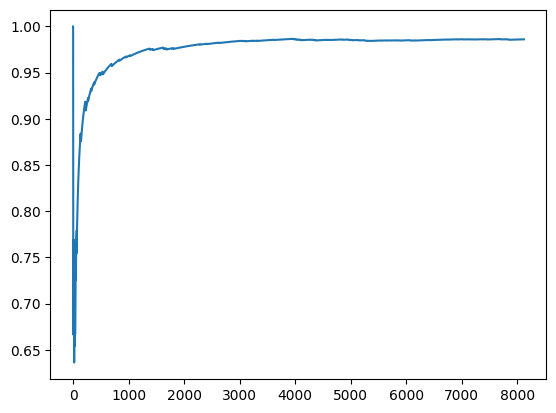

In [15]:
import matplotlib.pyplot as plt

n, _ = df.shape
plt.plot(range(n), avg_rewards)

In [16]:
total_reward

8011

In [17]:
choices

defaultdict(int, {'throw_p': 3859, 'eat_e': 4152, 'eat_p': 57, 'throw_e': 56})

In [28]:
df["poisonous"].value_counts(), df.shape

(poisonous
 e    4208
 p    3916
 Name: count, dtype: int64,
 (8124, 23))

In [19]:
from collections import Counter

Counter(last_n_actions)

Counter({'eat_e': 54, 'throw_p': 46})

In [20]:
list(zip(last_n_actions[-10:], last_n_probabilities[-10:]))

[('throw_p', array([0.00302732, 0.99697268])),
 ('throw_p', array([0.00389586, 0.99610414])),
 ('throw_p', array([0.00178094, 0.99821906])),
 ('throw_p', array([0.00312058, 0.99687942])),
 ('eat_e', array([0.99575166, 0.00424834])),
 ('throw_p', array([0.01868132, 0.98131868])),
 ('eat_e', array([0.99269333, 0.00730667])),
 ('throw_p', array([8.50716338e-04, 9.99149284e-01])),
 ('throw_p', array([0.00206233, 0.99793767])),
 ('eat_e', array([0.9894694, 0.0105306]))]